# Project:Movies data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### we will analysis movie  tmdb dataset
#### dataset contain many inforamtion about films like year of production , director, rating , revenue , ..... etc
#### will try to use this information in anaylsis and at the end will answer the questions 
#### steps of analysis 
- will upload dataset 
- will clean the data
- will make some statistical calculation and graph representation
- will answer 2 questions after observation 
##### first question : what is the most popular genre in each year 
#### our aim always to increase the revenue so,
#### secound question : what factors or other properties will effect the revenue 
#### after knowing the factor affect , so can use it correctly to inc the revenue 

In [1]:
#import packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#load the dataset
df =pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### check properties of dataset 
> as shape , describe , info , dtype 

In [3]:
#shape od dataset(size) rows and columns 
df.shape

(10866, 21)

In [4]:
#describe will print (min,max,mean,std,count,...) of each column values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#decribe each column (type and number of null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#show each column type
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning
> will clean data in many points 
- drop duplicated rows
- drop unused columns
- drop null rows
- change release_date's type into datetime type
- replace zero values in revenue & budget & runtime with average

In [7]:
# 1)remove duplicated rows

#first check how many duplicated rows/
df.duplicated().sum()

1

In [8]:
#print the rows duplicated
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
#drop the duplicated and check again 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
# 2)drop unused columns to make it easy in analysis

df.drop(['homepage','overview','tagline','keywords','production_companies','budget_adj','revenue_adj','imdb_id'],axis=1,inplace=True)

In [11]:
# 3)drop rows with null values 

#first check the null values in each columns
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [12]:
#then drop rows & then check again 
df.dropna(inplace=True)
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [13]:
# 4)change release_date from object into datetime type

df.release_date=pd.to_datetime(df.release_date)

#then check the type (will be datetime64)
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [14]:
# 5) change zero values of revenue & budget & runtime
#although values not null so can't use fillna but zero value not make sense so change it to mean

#first find zero values (just for checking)
df_rzero = df.query('revenue ==0')
df_bzero = df.query('budget==0')
df_tzero = df.query('runtime==0')

In [15]:
#this step just for knowing how many zero values in each column(not necessary)
print(df_rzero.count()['id'])
print(df_bzero.count()['id'])
print(df_tzero.count()['id'])

5888
5578
28


In [16]:
#function : replace zero values to mean of each column

def zero_mean(df,col,colname):
    df.replace({colname: {0 : col.mean()}},inplace=True)



In [17]:
zero_mean(df,df['revenue'], 'revenue');
zero_mean(df,df['budget'], 'budget');
zero_mean(df,df['runtime'], 'runtime');

In [18]:
#then replace zero values with mean of each column
df.replace({'revenue': {0 : df['revenue'].mean()}},inplace=True)
df.replace({'budget': {0 : df['budget'].mean()}},inplace=True)
df.replace({'runtime': {0 : df['runtime'].mean()}},inplace=True)


##### at the end .. check if there is more zero values 

###### will check it by min value of each column 
- min value in revenue = 2.0
- min value in budget = 1.0
- min value in runtime = 3.0

In [19]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,2.249862e+07,6.244304e+07,102.736197,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,2.814008e+07,1.116267e+08,30.040062,578.815324,0.930283,12.820151
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,1.480365e+07,4.024287e+07,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,1.480365e+07,4.031989e+07,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,1.600000e+07,4.031989e+07,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis






### Research Question 1 : most popular genres in each year

##### will represnt it by graph

- fisrt add new columns for years

In [20]:
df['year'] = df['release_date'].dt.year
df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,year
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,2015
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,2015
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,2015
3,140607,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,2015
4,168259,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,1.480365e+07,4.031989e+07,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95.0,Documentary,2066-06-15,11,7.4,1966,2066
10862,20379,0.065543,1.480365e+07,4.031989e+07,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176.0,Action|Adventure|Drama,2066-12-21,20,5.7,1966,2066
10863,39768,0.065141,1.480365e+07,4.031989e+07,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94.0,Mystery|Comedy,2066-01-01,11,6.5,1966,2066
10864,21449,0.064317,1.480365e+07,4.031989e+07,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80.0,Action|Comedy,2066-11-02,22,5.4,1966,2066


Text(0.5, 1.0, 'movie counts production in each year')

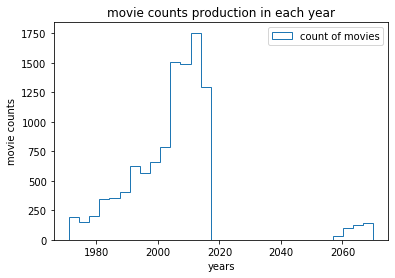

In [49]:
#make graph to represent number of movies released each year (30 columns "bins")
plt.hist(df['year'],bins=30, histtype=u'step',label='count of movies' )
plt.legend()
plt.ylabel('movie counts')
plt.xlabel('years')
plt.title("movie counts production in each year")

year
1971     43
1972     33
1973     43
1974     40
1975     40
1976     40
1977     47
1978     55
1979     46
1980     58
1981     62
1982     65
1983     60
1984     85
1985     80
1986     86
1987     87
1988     84
1989     93
1990     95
1991     93
1992     98
1993    112
1994    123
1995    118
1996    117
1997    116
1998    137
1999    133
2000    131
2001    152
2002    169
2003    170
2004    179
2005    189
2006    201
2007    223
2008    229
2009    257
2010    240
2011    257
2012    245
2013    243
2014    269
2015    273
2060     25
2061     26
2062     26
2063     30
2064     38
2065     33
2066     41
2067     28
2068     31
2069     25
2070     30
Name: genres, dtype: int64


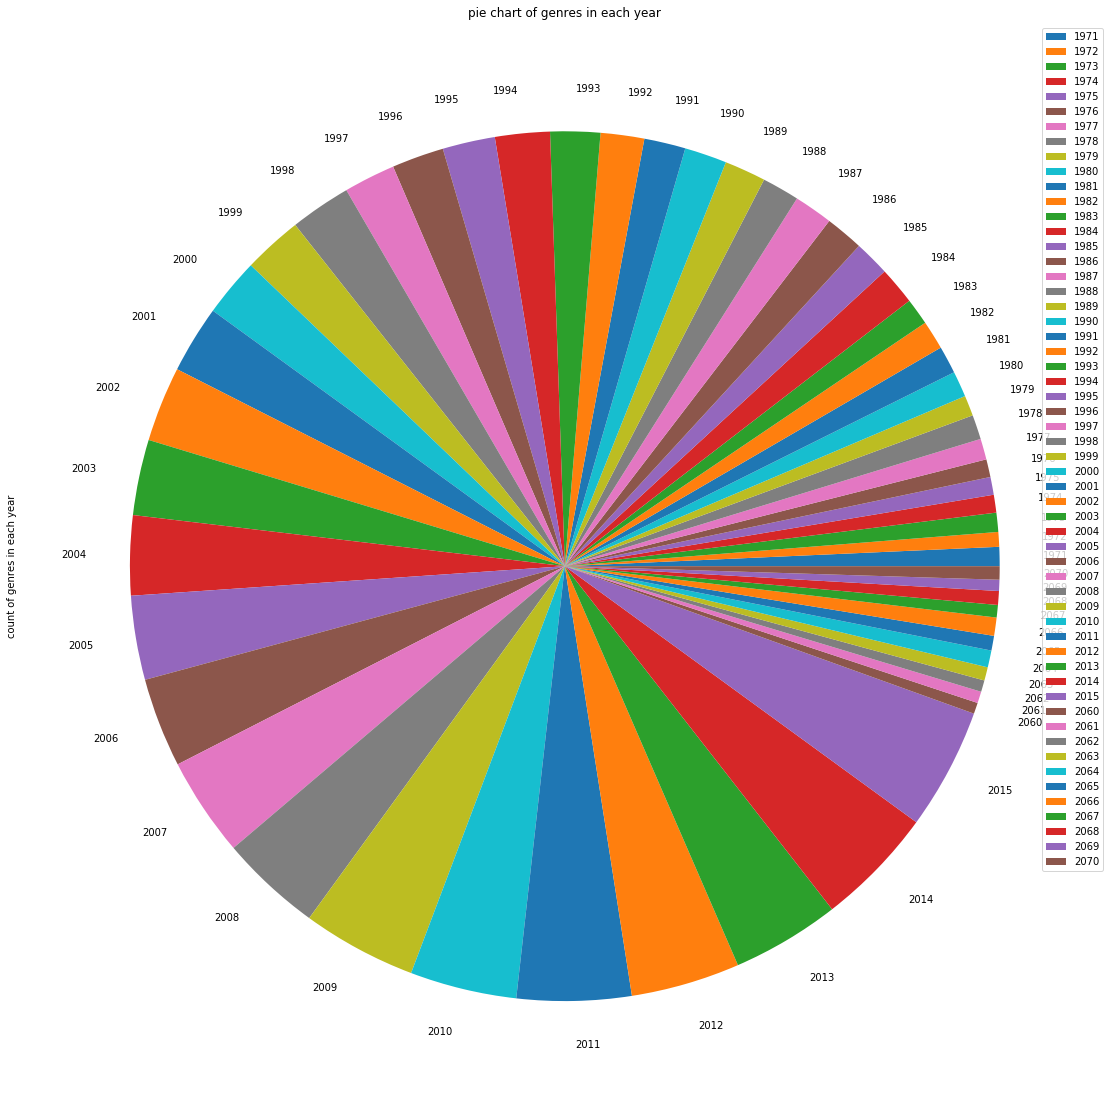

In [22]:
#this step not necessary but for knowing number of genres in each year
gen_year= df.groupby('year')['genres'].nunique()
print(gen_year)
gen_year.plot(kind='pie',figsize=(20,20),title='pie chart of genres in each year',label='count of genres in each year')
plt.legend()

- secound seperate genres by create new column for each genre (if genre=1 , if not genre=0)

In [23]:
dummies = df['genres'].str.get_dummies()
dummies.head()


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


- third make new dataframe and concatenat dummies with original dataframe 

In [24]:
df2= (pd.concat([df, dummies], axis=1))
df2.head()


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,...,0,0,0,0,0,1,0,1,0,0
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,...,0,0,0,0,0,1,0,1,0,0
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,...,0,0,0,0,0,1,0,1,0,0
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,...,0,0,0,0,0,1,0,0,0,0
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,...,0,0,0,0,0,0,0,1,0,0


- fourth sum the values of each genre and sort them 

In [25]:
df2.iloc[:, 13:-1]

,year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War
0,2015,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2015,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,2015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,2015,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,2015,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,2066,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10862,2066,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10863,2066,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10864,2066,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
#get genres columns only - sum each column - sort them - print or get the name of genre
top_genre = (df2.iloc[:, 14:-1]
              .sum()
              .sort_values(ascending=False)              
              .index.values)

top_genre

array(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
       'Adventure', 'Crime', 'Science Fiction', 'Family', 'Fantasy',
       'Mystery', 'Animation', 'Documentary', 'Music', 'History', 'War',
       'Foreign', 'TV Movie'], dtype=object)

##### so counculsion is :
- drama is 1st genre in all movies
- comedy is 2nd genre in all movies 
- ... and so on

- fifth will visualize the genres in each year 

Text(0.5, 0, 'years')

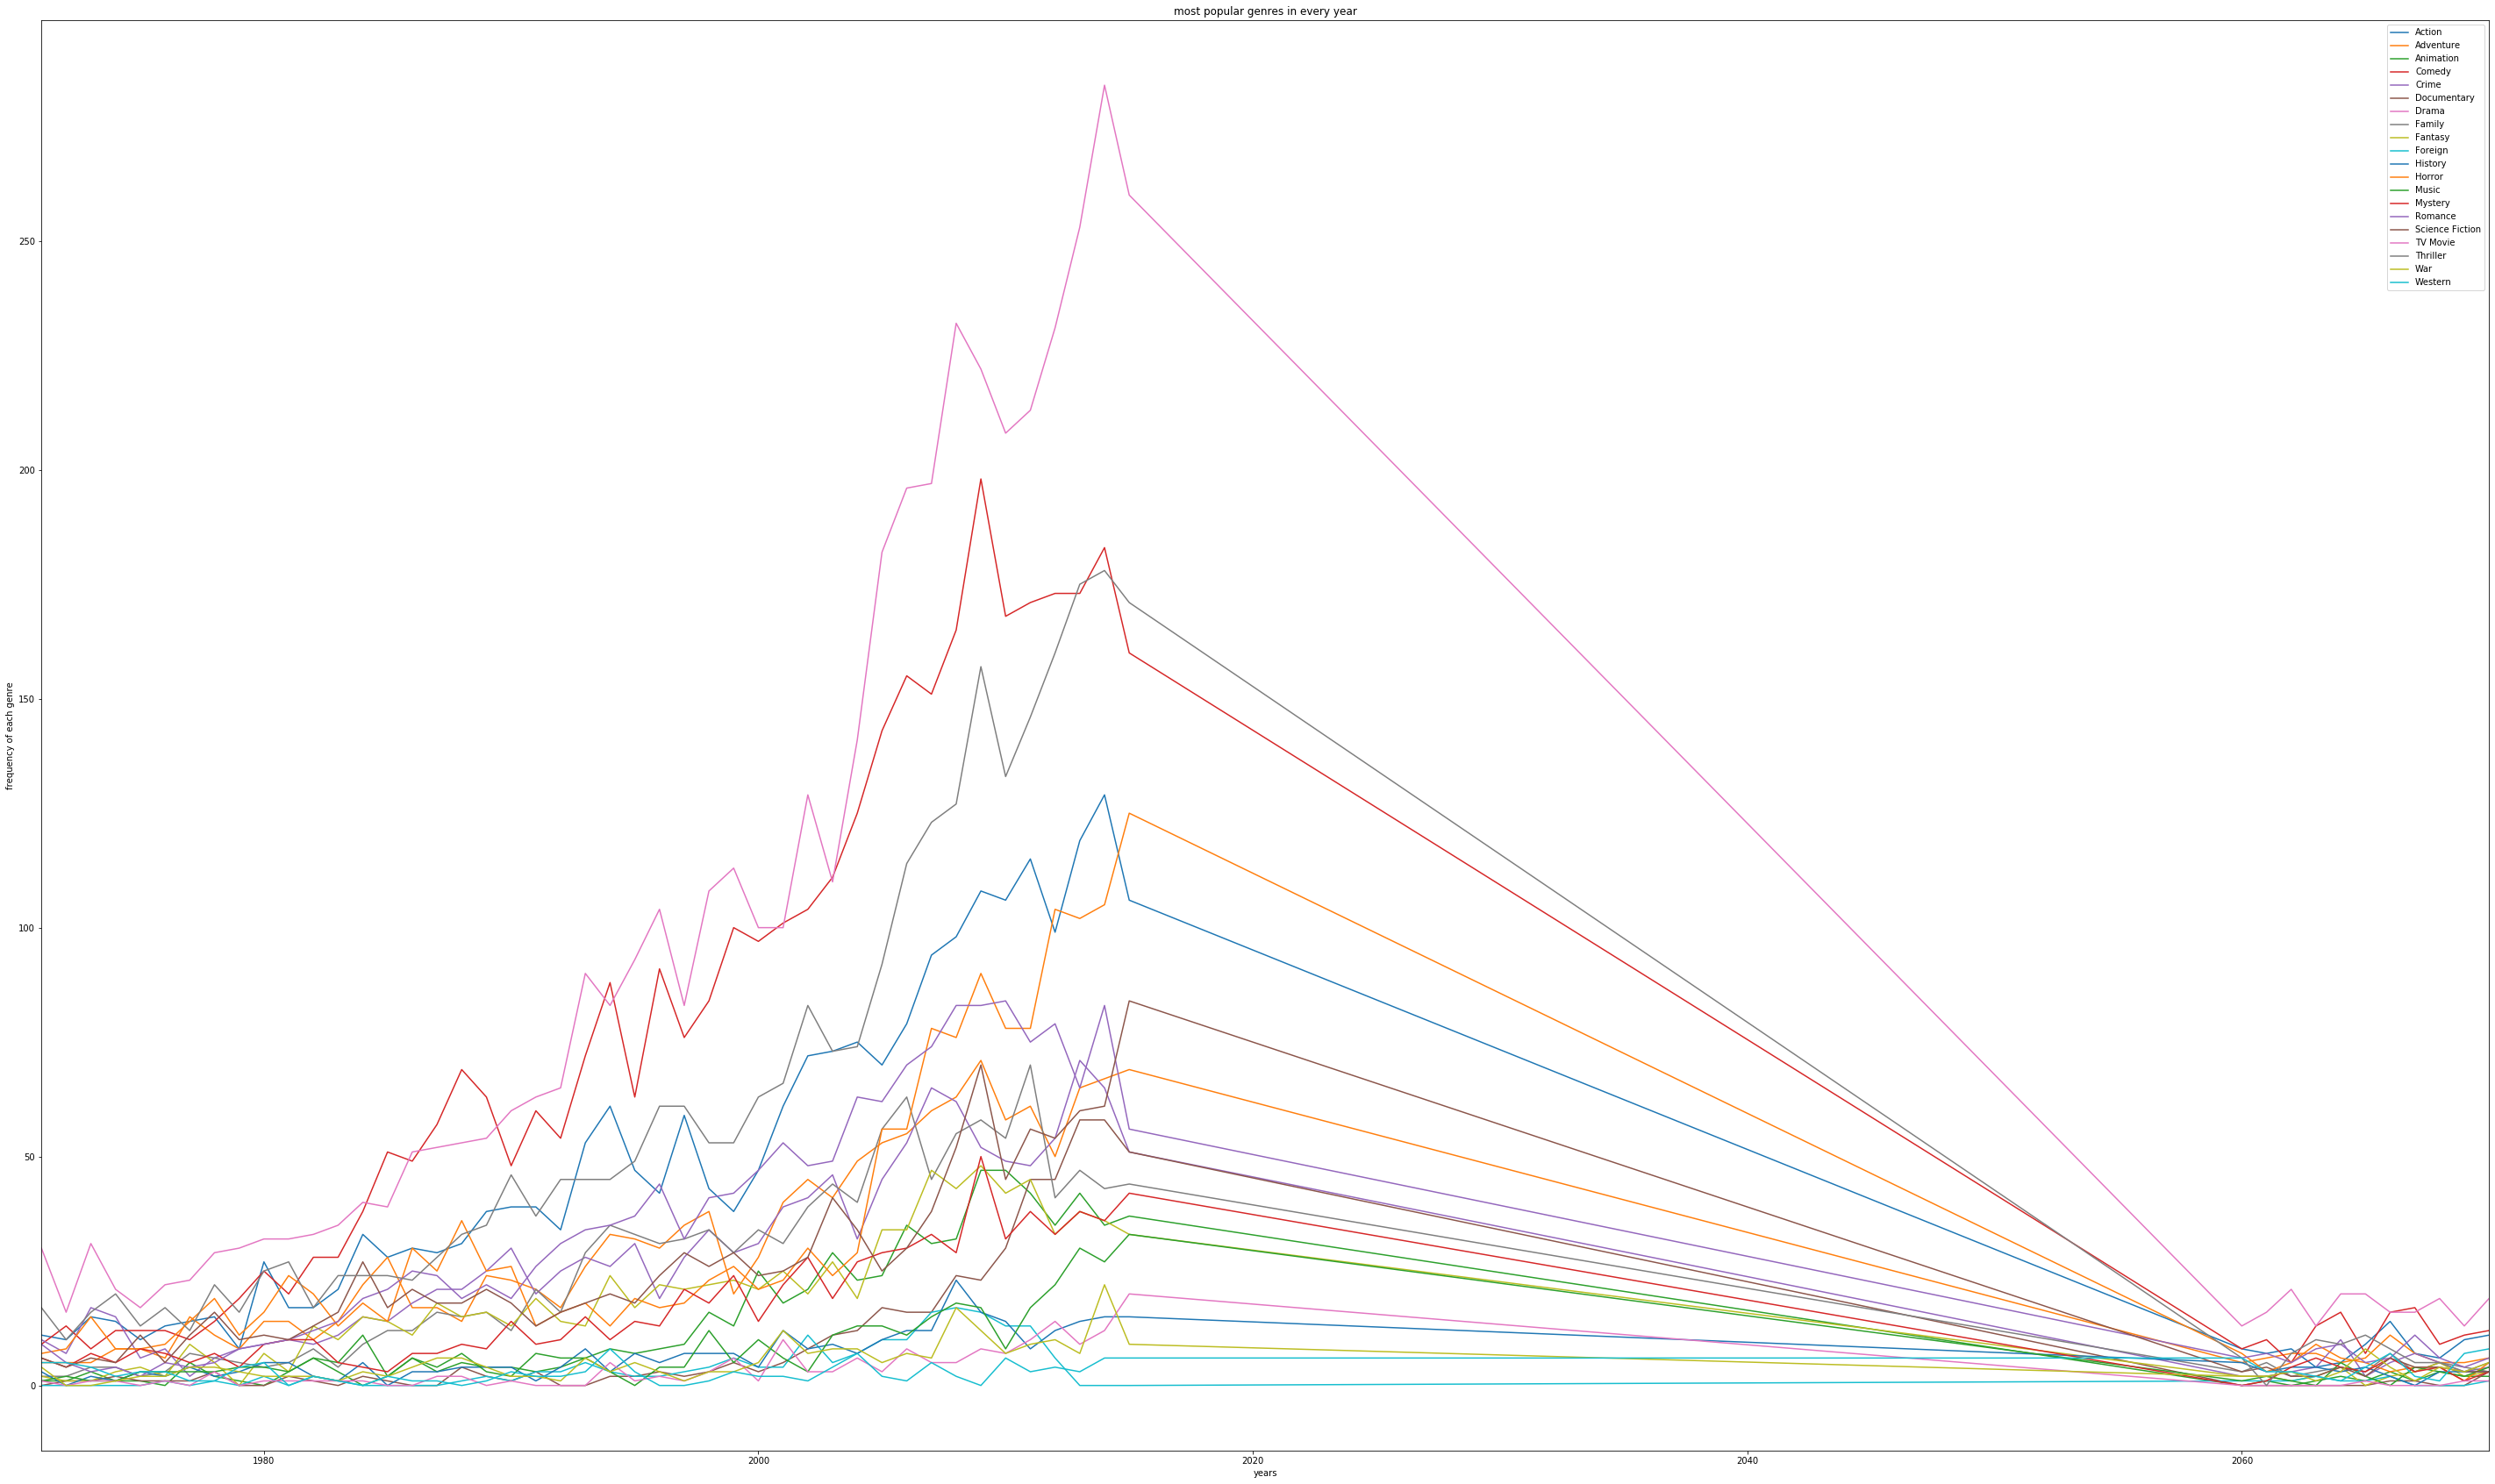

In [27]:
#get genres columns only - and group by year - and sum them
genre_groups = (df2.iloc[:, 13:].groupby("year").sum())

#then visualize the result
genre_groups.plot(figsize=(50,30),title="most popular genres in every year")
plt.legend()
plt.ylabel('frequency of each genre')
plt.xlabel('years')

###### if want genres of specific year .. just change the year 

In [28]:
df_year=df2[df2.year == 2010]
print(df_year)
genre_year = (df_year.iloc[:, 14:].sum())
print(genre_year)



         id  popularity        budget       revenue  \
1919  27205    9.363643  1.600000e+08  8.255000e+08   
1920  10138    5.704860  2.000000e+08  6.239333e+08   
1921  12155    5.572950  2.000000e+08  1.025467e+09   
1922  44214    5.293180  1.300000e+07  3.278037e+08   
1923  12444    4.840588  2.500000e+08  9.543059e+08   
...     ...         ...           ...           ...   
2402  37058    0.019248  1.480365e+07  4.031989e+07   
2404  44950    0.009766  1.480365e+07  4.031989e+07   
2406  24243    0.063754  1.480365e+07  4.031989e+07   
2407  41397    0.004569  1.480365e+07  4.031989e+07   
2408  40025    0.004433  1.480365e+07  4.031989e+07   

                                    original_title  \
1919                                     Inception   
1920                                    Iron Man 2   
1921                           Alice in Wonderland   
1922                                    Black Swan   
1923  Harry Potter and the Deathly Hallows: Part 1   
...            

Text(0.5, 0, 'genres')

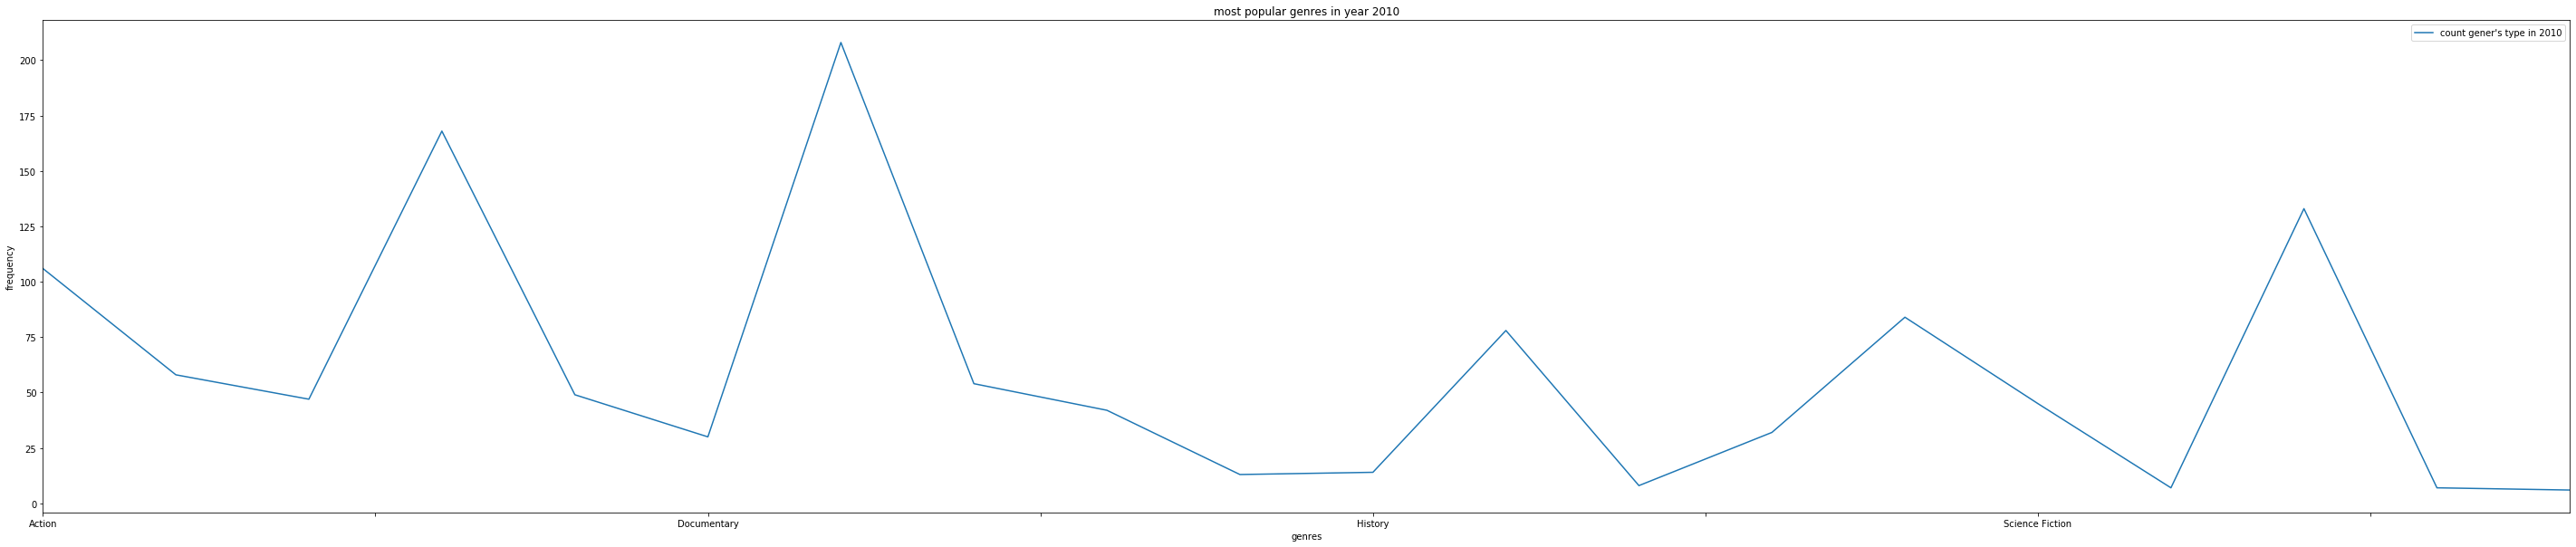

In [29]:
#then visualize the result
genre_year.plot(figsize=(50,10),title="most popular genres in year 2010",label="count gener's type in 2010")
plt.legend()
plt.ylabel('frequency')
plt.xlabel('genres')

### Research Question 2 : what properties 

In [30]:
#drop more not used columns to make it more easier to make scatter graph
df.drop(['cast','original_title','release_year'],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD3CF54DC8>,
      dtype=object)

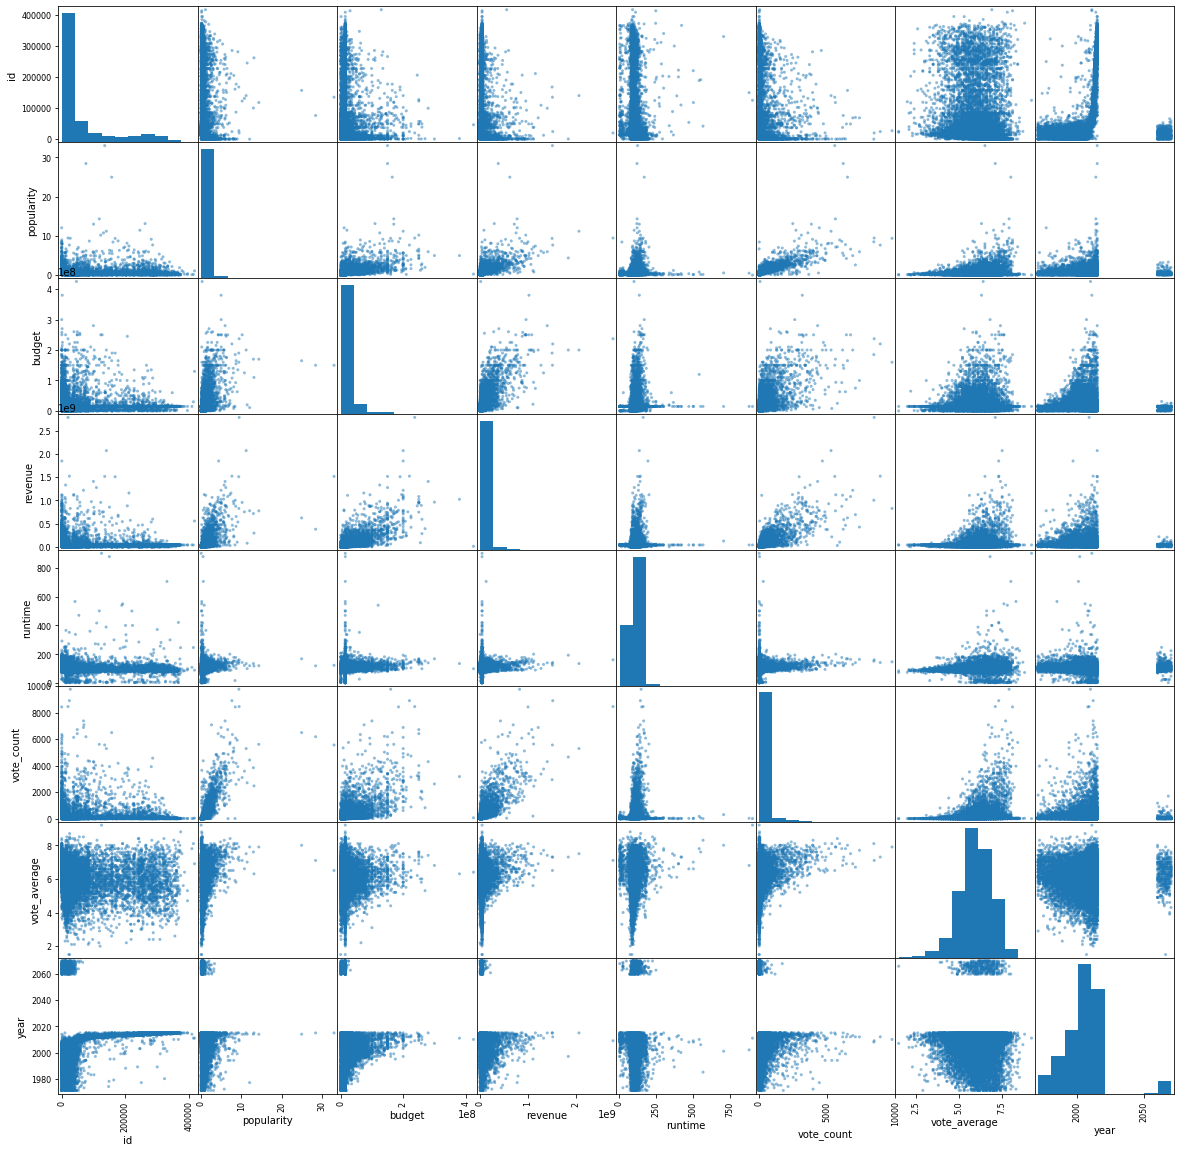

In [31]:
#show all relationship
pd.plotting.scatter_matrix(df,figsize=(20,20))


## from this graph can observe 
- revenue & year : revenue small when there is small amount of films and increase by increasing films .. so direct relation
- revenue & voting : small voting will effect the revenue and make it small .. but also there is large voting and the revenue is small sometimes and big somtimes .. its normal distribution skewed right
- revenue & runtime : very small runtime will affect small revenue .. by increasing runtime will inc revenue but the runtime above 200 will decrease the revenue again .. so best runtime achieve the revenve average between 30or40 to 200 
- revenue & budget : small budget will get small revenue .. by increasing budget will increase revenue
- revenue & popularity : also by increasing popularity will increase revenue but most revenue at popularity = 10 after this by increase popularity will dec revenue

### first relation between year and revenue

year
1971    3.741865e+07
1972    4.260817e+07
1973    5.011158e+07
1974    4.308297e+07
1975    4.833561e+07
1976    4.363664e+07
1977    6.197892e+07
1978    4.650608e+07
1979    5.077880e+07
1980    4.283510e+07
1981    4.229319e+07
1982    5.075999e+07
1983    4.295608e+07
1984    4.511383e+07
1985    4.193415e+07
1986    3.980711e+07
1987    4.482854e+07
1988    4.393517e+07
1989    5.558131e+07
1990    5.706637e+07
1991    5.448686e+07
1992    6.131930e+07
1993    5.501256e+07
1994    5.981771e+07
1995    6.977019e+07
1996    6.060671e+07
1997    7.351855e+07
1998    6.517354e+07
1999    6.977509e+07
2000    6.935200e+07
2001    7.454867e+07
2002    7.471178e+07
2003    7.424793e+07
2004    7.348393e+07
2005    6.552204e+07
2006    6.004722e+07
2007    6.714768e+07
2008    6.327281e+07
2009    6.720787e+07
2010    6.812961e+07
2011    6.659526e+07
2012    6.813566e+07
2013    6.322525e+07
2014    6.257360e+07
2015    6.957978e+07
2060    3.603132e+07
2061    3.820767e+07
2062    

Text(0.5, 0, 'year')

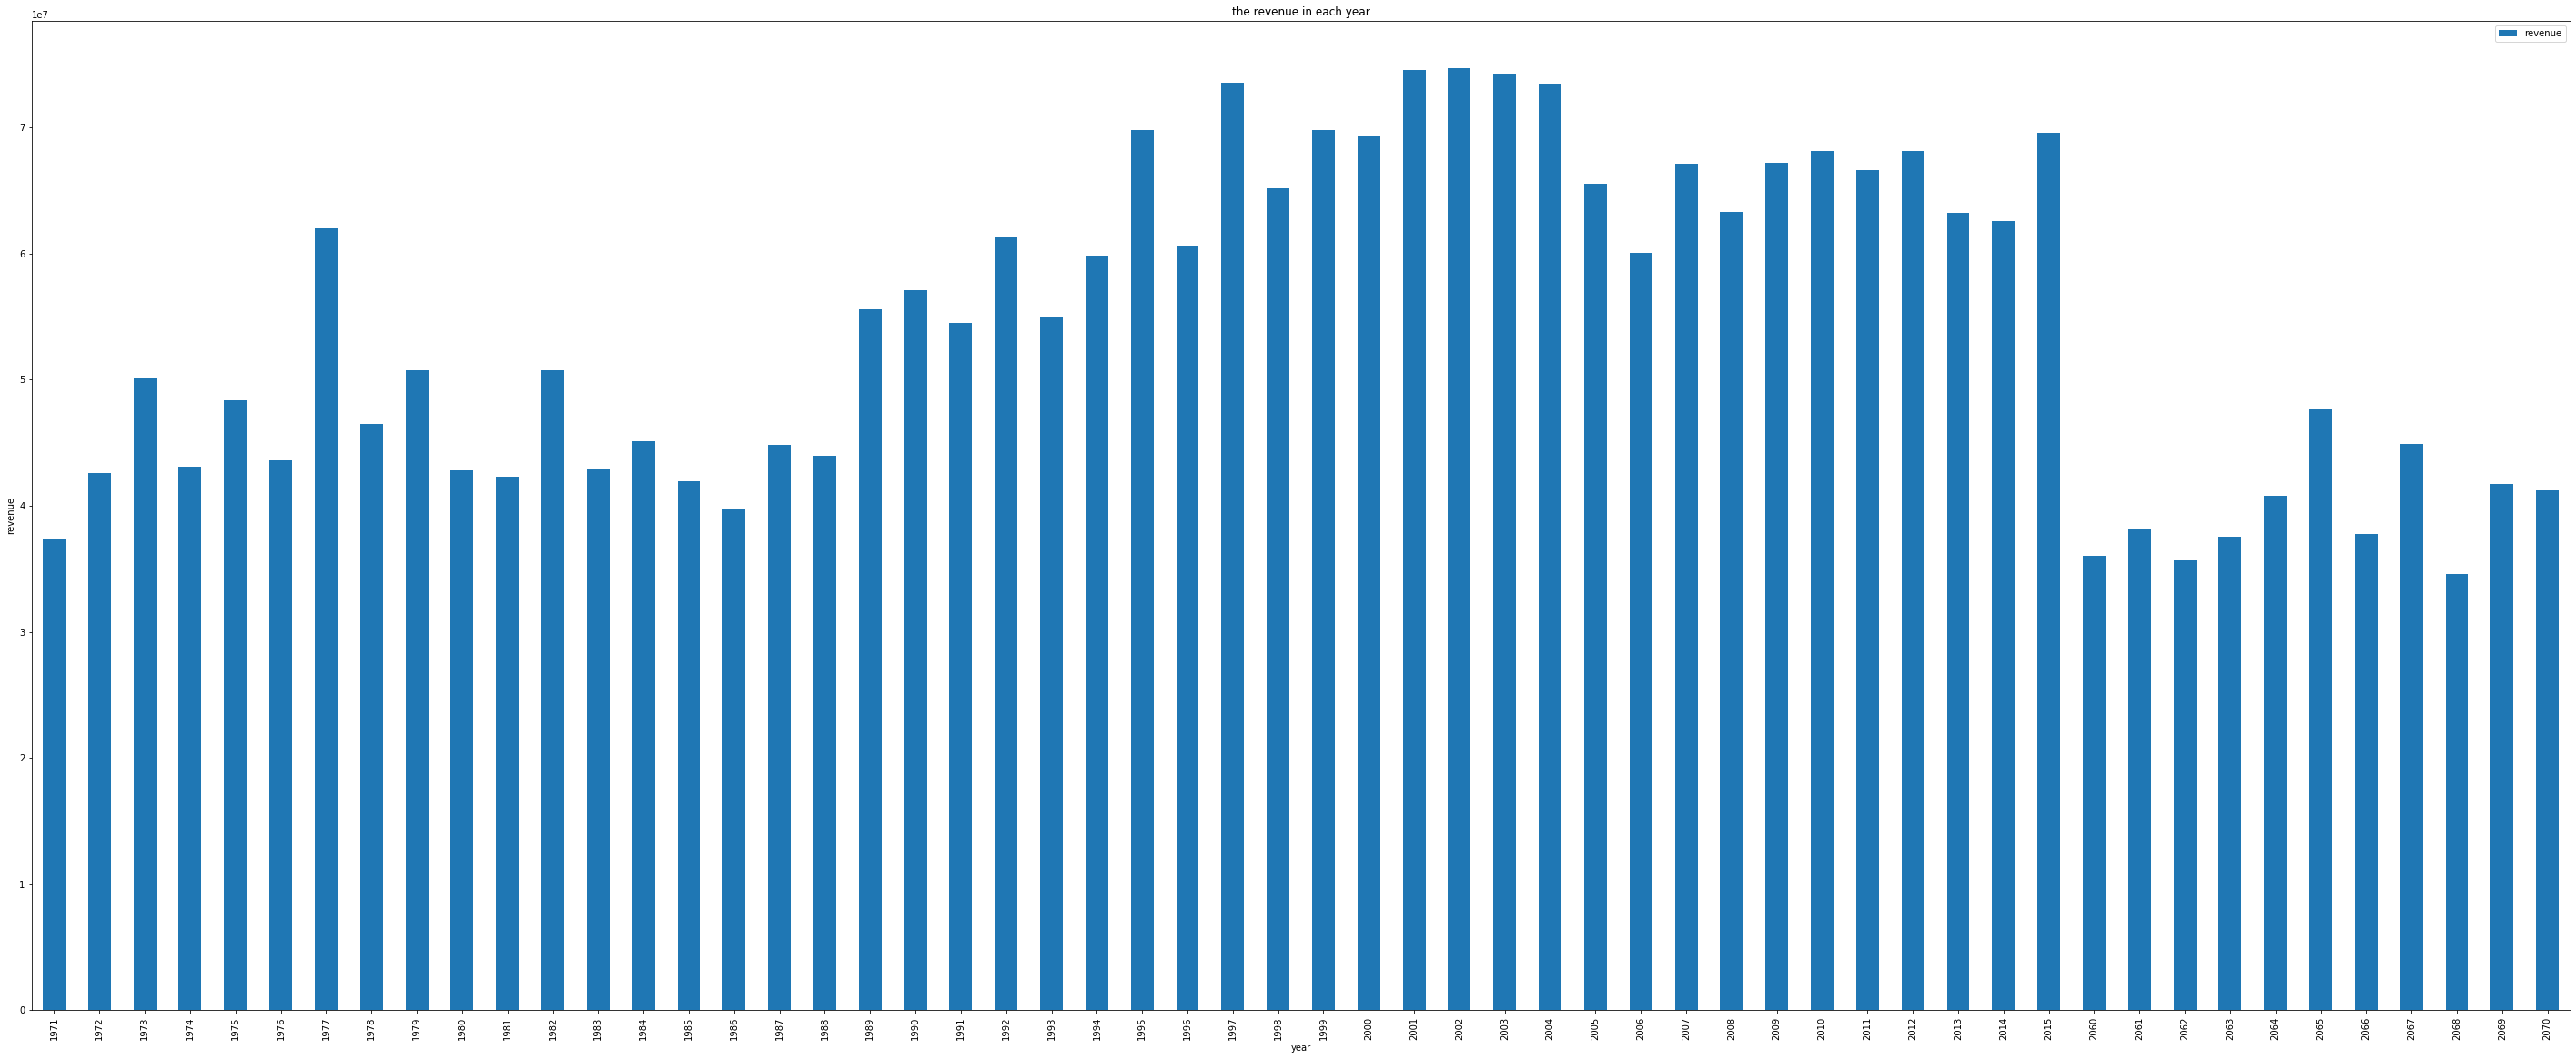

In [32]:
print(df.groupby('year')['revenue'].mean())
df.groupby('year')['revenue'].mean().plot(kind='bar',figsize=(50,20),title="the revenue in each year");
plt.legend()
plt.ylabel('revenue')
plt.xlabel('year')

year
1971      1137584
1972       704684
1973       997893
1974       861988
1975       760791
1976       744888
1977      1399746
1978      1411200
1979      1086718
1980      1639820
1981      1560246
1982      1403773
1983      1400668
1984      1597228
1985      1611221
1986      1872679
1987      2034153
1988      2623267
1989      2473917
1990      1857851
1991      1905608
1992      1780976
1993      2563023
1994      3231011
1995      2864124
1996      3000433
1997      2904696
1998      3092866
1999      4150239
2000      3421604
2001      4086245
2002      3568752
2003      5527642
2004      4468149
2005      4859220
2006      5787314
2007      6590992
2008      8801324
2009     15642829
2010     21794652
2011     36661093
2012     59318735
2013    109509786
2014    165338265
2015    182709449
2060       502889
2061       578367
2062       544034
2063       562904
2064       729942
2065       614765
2066       759644
2067       614366
2068       677801
2069       588186
2070 

Text(0.5, 0, 'years')

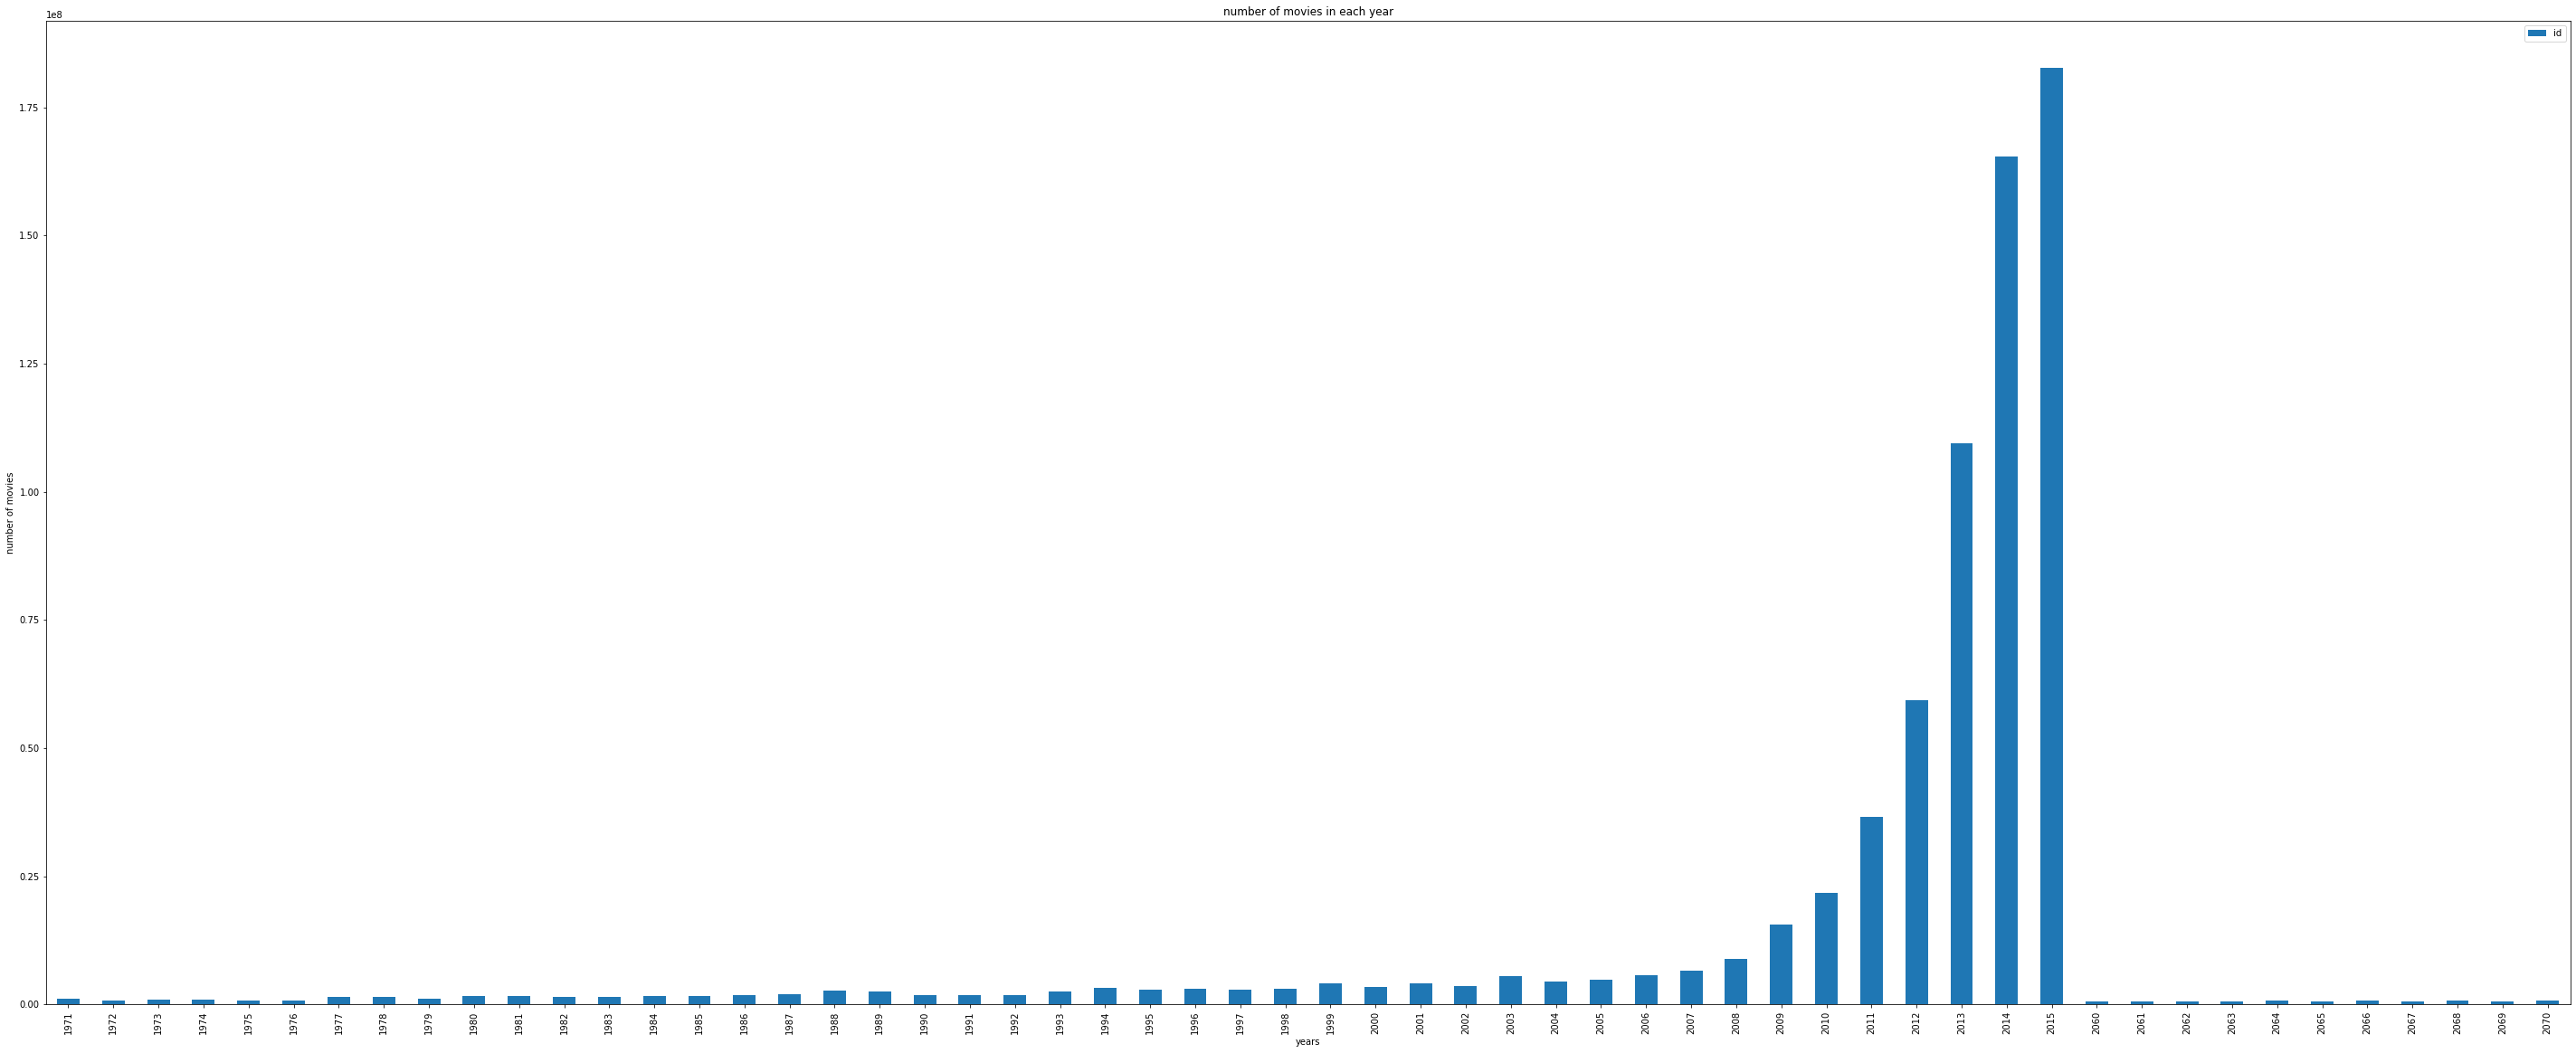

In [33]:
print(df.groupby('year')['id'].sum())
df.groupby('year')['id'].sum().plot(kind='bar',figsize=(50,20),title="number of movies in each year");
plt.legend()
plt.ylabel('number of movies')
plt.xlabel('years')

#### observation
- there is no films between years 2015 to 2060 (it also appear in scatter graph) 
- although (2015,2014,2013) the most years produce in it films but not the largest revenue
- the largest revenue in years (2002,2001,2003,1997)

### second relation between budget and revenue

budget
237000000.0    2.781506e+09
220000000.0    1.519558e+09
280000000.0    1.405036e+09
380000000.0    1.021683e+09
300000000.0    9.610000e+08
                   ...     
25.0           2.150000e+01
2.0            1.600000e+01
20.0           1.500000e+01
11.0           1.100000e+01
6.0            1.100000e+01
Name: revenue, Length: 553, dtype: float64


Text(0.5, 0, 'budget')

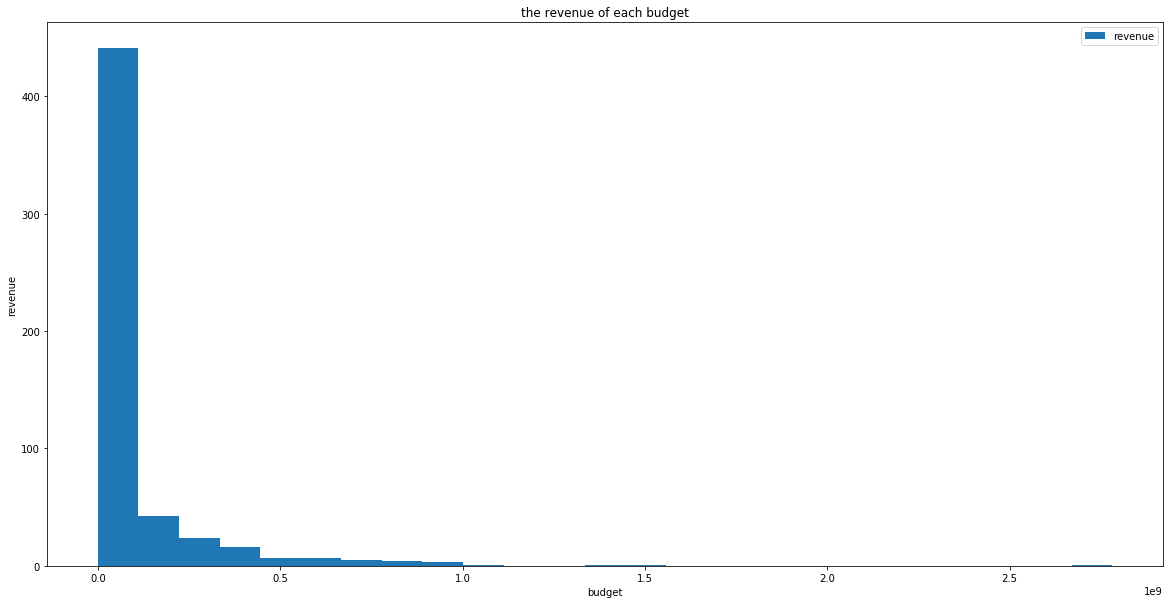

In [34]:
print(df.groupby('budget')['revenue'].mean().sort_values(ascending=False))
df.groupby('budget')['revenue'].mean().plot(kind='hist',figsize=(20,10),bins=25,title="the revenue of each budget");
plt.legend()
plt.ylabel('revenue')
plt.xlabel('budget')

revenue
1.108757e+07    4.250000e+08
1.021683e+09    3.800000e+08
9.610000e+08    3.000000e+08
1.405036e+09    2.800000e+08
3.910812e+08    2.700000e+08
                    ...     
2.700000e+01    8.000000e+00
1.600000e+01    4.333333e+00
4.300000e+01    3.000000e+00
1.378000e+03    1.000000e+00
1.000000e+02    1.000000e+00
Name: budget, Length: 4698, dtype: float64


Text(0.5, 0, 'revenue')

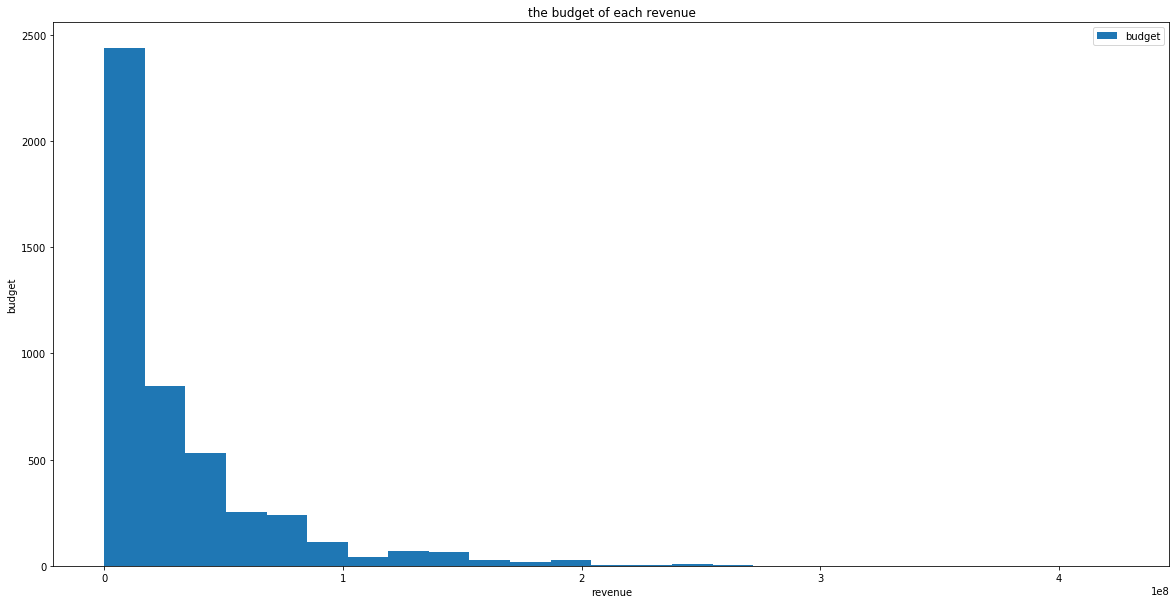

In [35]:
print(df.groupby('revenue')['budget'].mean().sort_values(ascending=False))
df.groupby('revenue')['budget'].mean().plot(kind='hist',figsize=(20,10),bins=25,title="the budget of each revenue");
plt.legend()
plt.ylabel('budget')
plt.xlabel('revenue')

#### observation
- small revenue will achieve more frequency than large revenue
- the largest revenue at the budget=237000000.0 and revenue=2.781506e+09

### third relation between voting and revenue

Text(0.5, 1.0, 'frecquency of average vote')

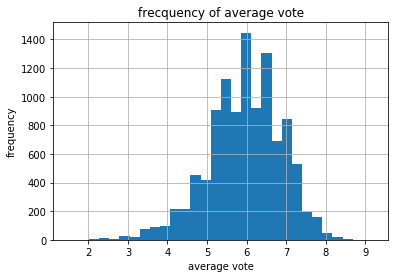

In [52]:
#first graph / plot the number of average voting values only 
df['vote_average'].hist(bins=30)
plt.xlabel('average vote')
plt.ylabel('frequency')
plt.title("frecquency of average vote")

vote_average
1.5    4.031989e+07
2.0    4.031989e+07
2.1    2.991637e+07
2.2    2.690449e+07
2.3    4.031989e+07
           ...     
8.4    3.440496e+07
8.5    4.031989e+07
8.7    4.031989e+07
8.8    4.031989e+07
9.2    4.031989e+07
Name: revenue, Length: 70, dtype: float64


Text(0.5, 0, 'average vote')

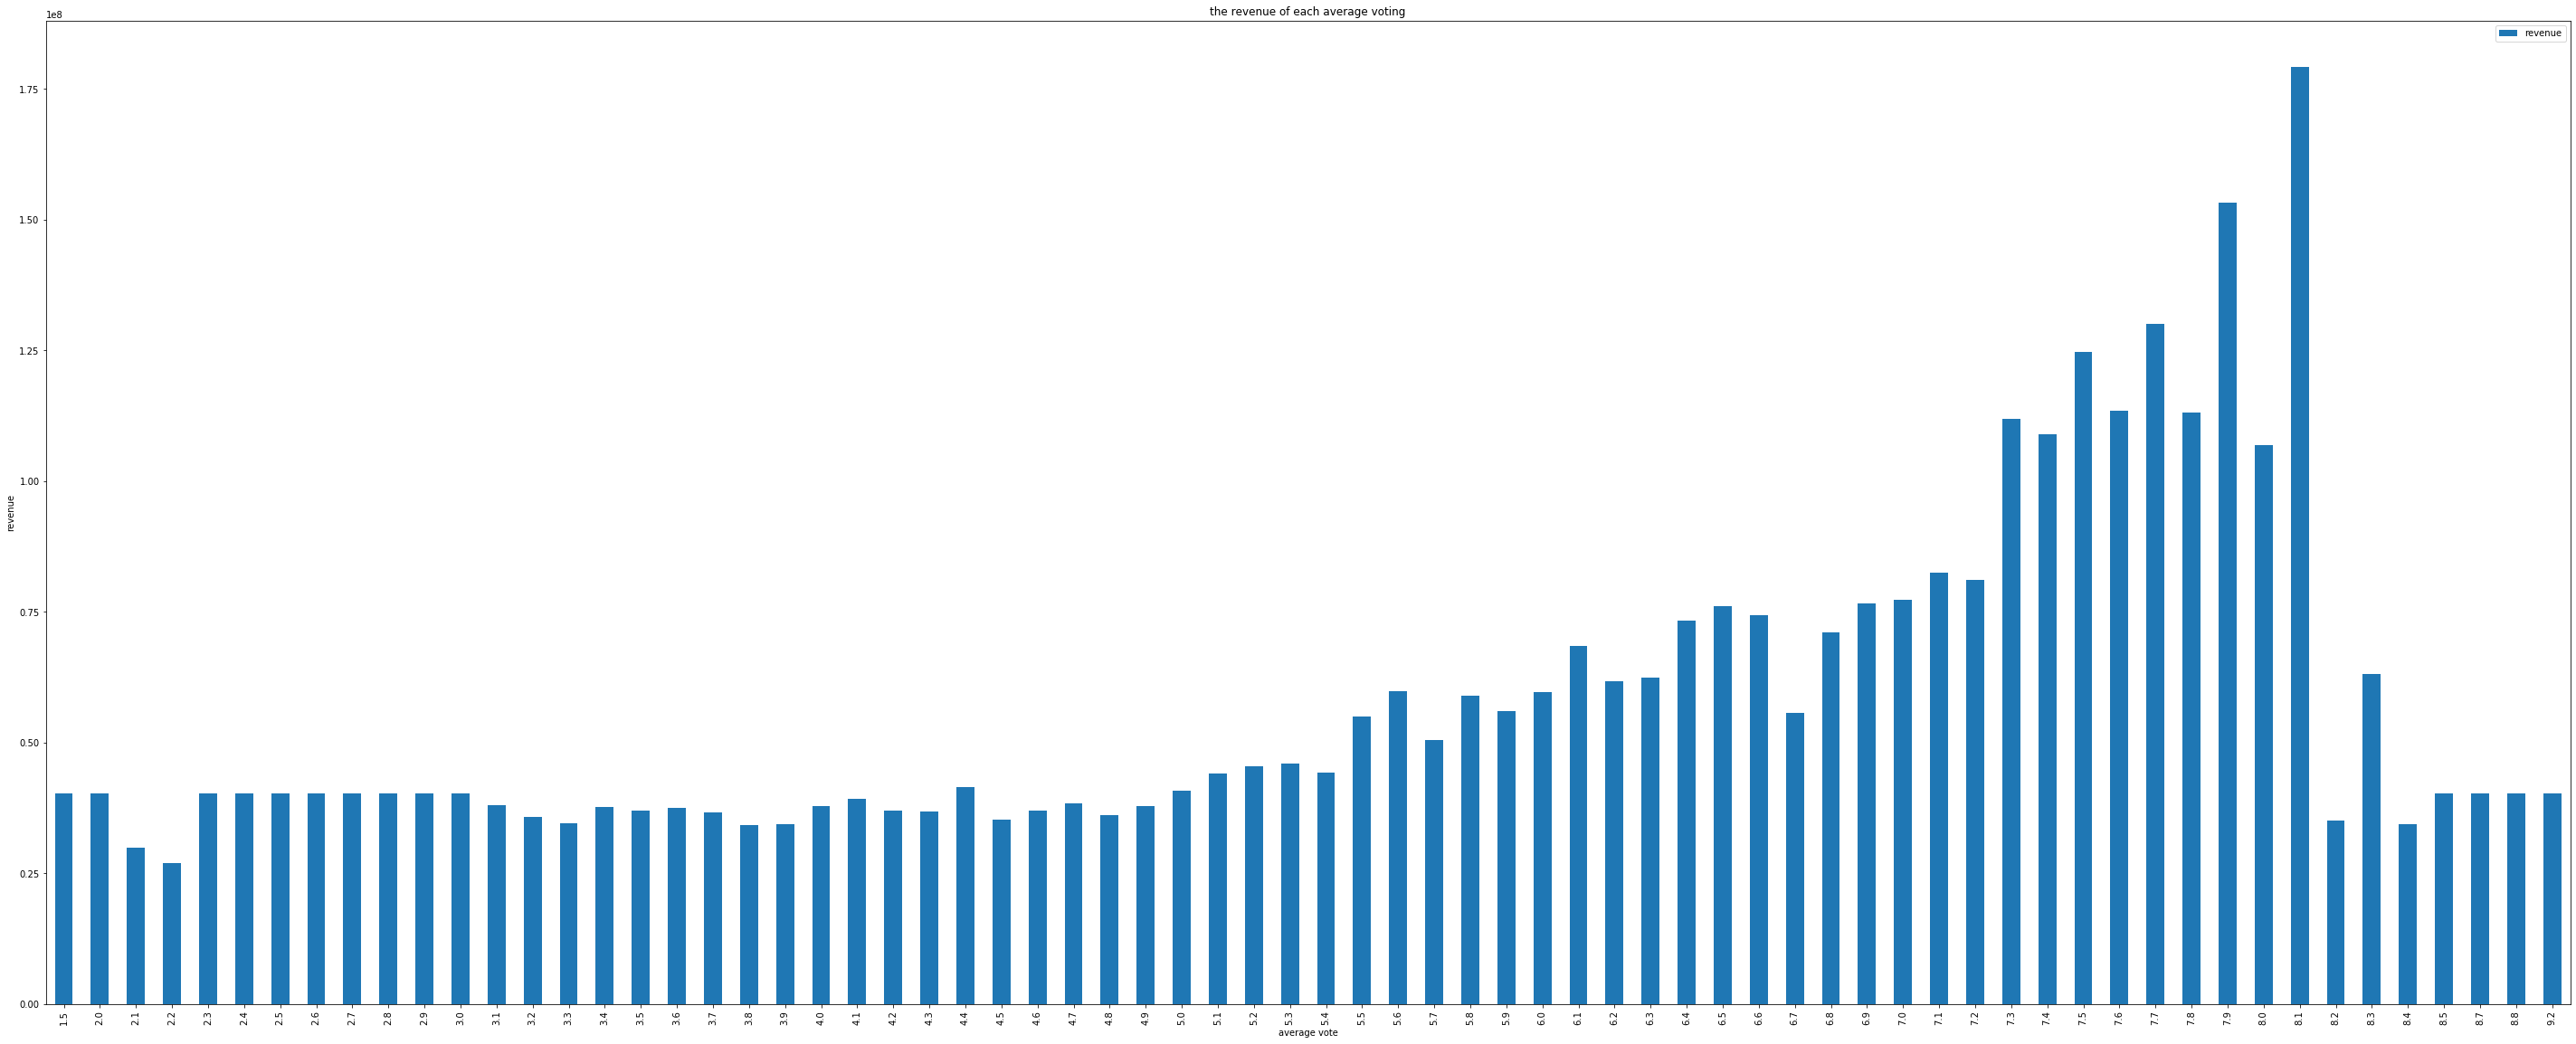

In [37]:
print(df.groupby('vote_average')['revenue'].mean())
df.groupby('vote_average')['revenue'].mean().plot(kind='bar',figsize=(50,20),title="the revenue of each average voting");
plt.legend()
plt.ylabel('revenue')
plt.xlabel('average vote')

#### observation
- it's normal by icrease voting on film it's revenue will icrease also 
- and the largest revenue at voting = 8.1 then 7.9
- after this, vote above 8.1 will make the revenue decrease

### fourth relation between runtime and revenue

Text(0.5, 1.0, 'frequency of runtime ')

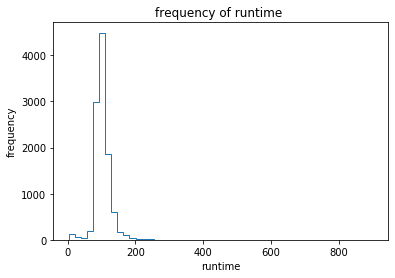

In [54]:
#make graph to represent values of runtime column only
plt.hist(df['runtime'],bins=50, histtype=u'step' )
plt.ylabel('frequency')
plt.xlabel('runtime')
plt.title("frequency of runtime ")

Text(0.5, 0, 'runtime')

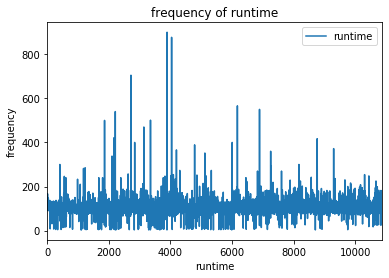

In [39]:
#another representation type of graph of same column runtime
df['runtime'].plot.line(title="frequency of runtime")
plt.legend()
plt.ylabel('frequency')
plt.xlabel('runtime')

runtime
3.0       40319888.0
4.0       40319888.0
5.0       40319888.0
6.0       40319888.0
7.0       40319888.0
            ...     
550.0     40319888.0
566.0     40319888.0
705.0    125000000.0
877.0     40319888.0
900.0     40319888.0
Name: revenue, Length: 243, dtype: float64


Text(0.5, 0, 'runtime')

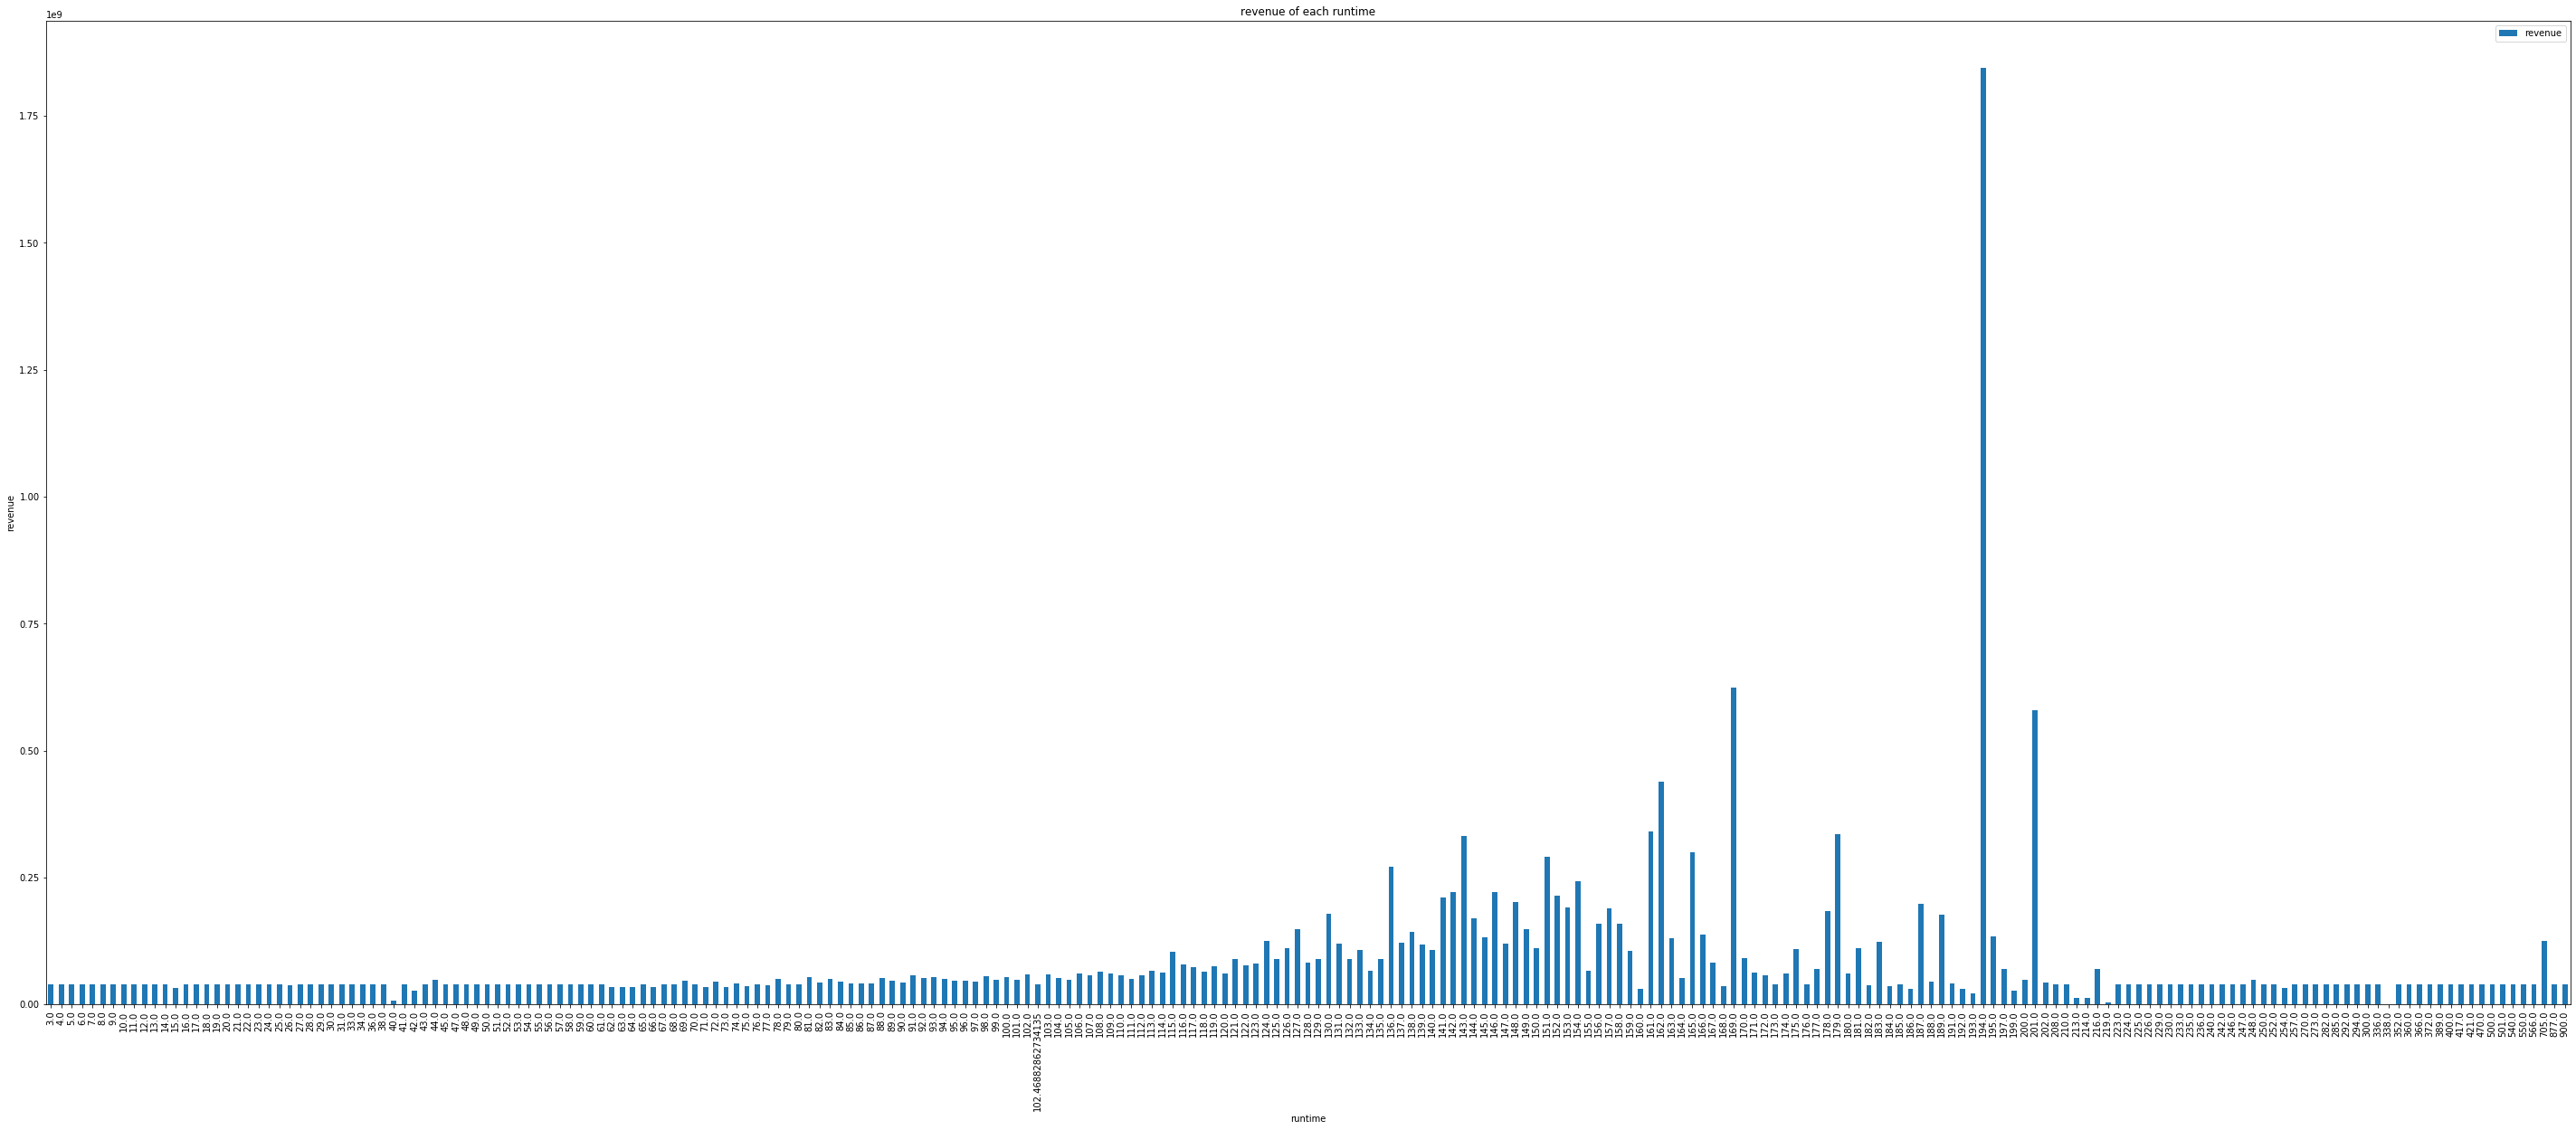

In [40]:
print(df.groupby('runtime')['revenue'].mean().round())
df.groupby('runtime')['revenue'].mean().plot(kind='bar',figsize=(50,20),title="revenue of each runtime");
plt.legend()
plt.ylabel('revenue')
plt.xlabel('runtime')

#### observation
- very small runtime will make small revenue 
- by increasing the runtime =115 the revenue will increase 
- the top or largest revenue achieved by runtime = 194
- then revenue will decrease again from runtime = 202

- so the best runtime is 194

### fifth and last relation between genres and revenue

Text(0.5, 0, 'genres types')

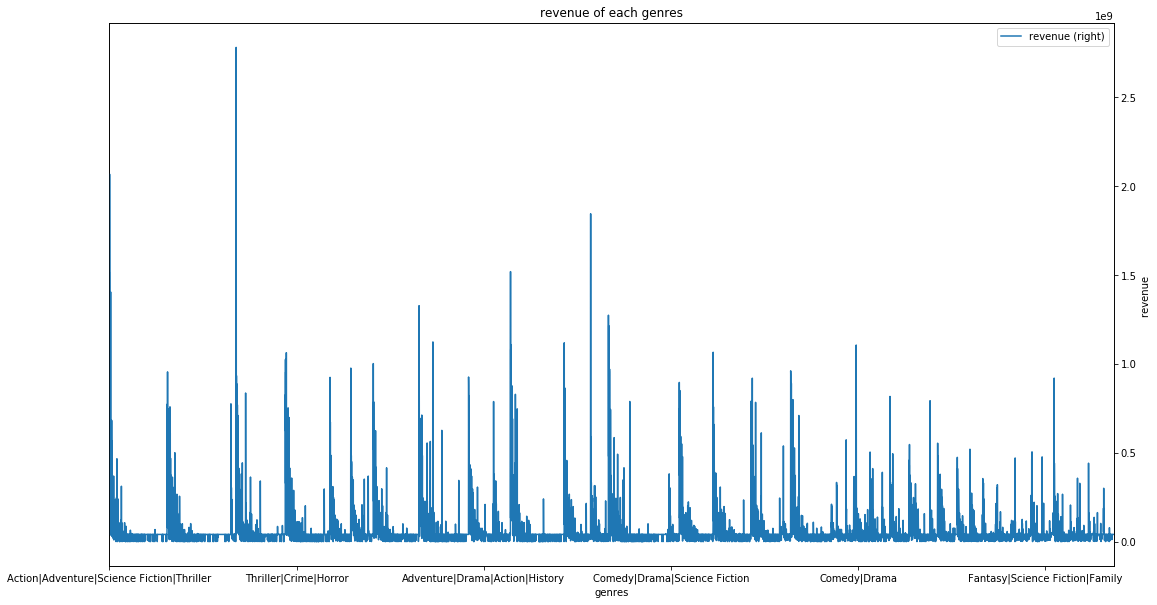

In [57]:
fig, ax = plt.subplots()
df.plot(x = 'genres', y = 'revenue', ax = ax,secondary_y = True , figsize=(18,10),title="revenue of each genres") 

plt.ylabel('revenue ')
plt.xlabel('genres types')

#### observation
- in each combination of genre, there are films with high revenue 
- but the film's genre with highest revenue in all combination of genres is action|adventure|science|thriller with more than 2.5 revenue

In [42]:
genre_list = df['genres'].str[0:].str.split('|',expand = True)

In [43]:
print(genre_list)

                 0                1                2         3     4
0           Action        Adventure  Science Fiction  Thriller  None
1           Action        Adventure  Science Fiction  Thriller  None
2        Adventure  Science Fiction         Thriller      None  None
3           Action        Adventure  Science Fiction   Fantasy  None
4           Action            Crime         Thriller      None  None
...            ...              ...              ...       ...   ...
10861  Documentary             None             None      None  None
10862       Action        Adventure            Drama      None  None
10863      Mystery           Comedy             None      None  None
10864       Action           Comedy             None      None  None
10865       Horror             None             None      None  None

[10731 rows x 5 columns]


<a id='conclusions'></a>
## Conclusions

#### after making analysis and statistical calculation and graph types represntation  

- drama is 1st genre in all movies
- the largest revenue in year=2015 
- the largest revenue in budget=237000000.0 and revenue=2.781506e+09
- the largest revenue in at voting = 8.1
- the largest revenue in runtime = 194
- the largest revenue in geners combination action|adventure|science|thriller 


### so use this information to :
- use the budget about 237000000.0 and runtime 194 and genres combination action|adventure|science|thriller .. also the best voting you must achieve 8.1

### Limitations
- it's flaw that there is no production films between years from 2015 to 2060
- also there is runtime & budget & revenue equal zero which not make sense 
